#  Análisis Avanzado de Fricción en Tubos
**Métodos Numéricos en Ingeniería Mecánica**

## 1. Introducción y Objetivos de Aprendizaje Avanzados

Al finalizar esta clase avanzada, los estudiantes serán capaces de:
1. Analizar en profundidad el comportamiento del factor de fricción en diferentes regímenes de flujo.
2. Implementar y optimizar múltiples métodos numéricos para resolver la ecuación de Colebrook.
3. Desarrollar algoritmos robustos que combinen diferentes métodos numéricos.
4. Utilizar técnicas de visualización avanzadas para analizar el comportamiento de las soluciones.
5. Aplicar los conocimientos a problemas reales de diseño en ingeniería mecánica y aeroespacial.

## 2. Teoría Avanzada de Flujo de Fluidos en Tuberías

### 2.1 Análisis Dimensional y Semejanza
- Teorema Pi de Buckingham aplicado al flujo en tuberías
- Derivación de la forma adimensional de la ecuación de Colebrook

### 2.2 Transición entre Flujo Laminar y Turbulento
- Análisis detallado del comportamiento cerca de Re = 4000
- Implicaciones para la selección de métodos numéricos

## 3. Formulación Matemática Avanzada

### 3.1 Ecuación de Colebrook Generalizada
$$0 = \frac{1}{\sqrt{f}} + 2.0 \log\left(\frac{\varepsilon}{3.7D} + \frac{2.51}{Re\sqrt{f}}\right)$$

### 3.2 Análisis de Sensibilidad
- Derivadas parciales respecto a ε, D, y Re
- Implicaciones para la estabilidad numérica

## 4. Implementación Avanzada de Métodos Numéricos

### 4.1 Método de Newton-Raphson Optimizado

In [1]:
import numpy as np

def colebrook(f, Re, epsilon, D):
    return 1/np.sqrt(f) + 2*np.log10(epsilon/(3.7*D) + 2.51/(Re*np.sqrt(f)))

def colebrook_derivative(f, Re, epsilon, D):
    return -1/(2*f*np.sqrt(f)) - (2.51/(Re*np.log(10)))/(f*(epsilon/(3.7*D) + 2.51/(Re*np.sqrt(f))))

def newton_raphson(Re, epsilon, D, f_init=0.02, tol=1e-8, max_iter=50):
    f = f_init
    for i in range(max_iter):
        f_new = f - colebrook(f, Re, epsilon, D) / colebrook_derivative(f, Re, epsilon, D)
        if abs(f_new - f) < tol:
            return f_new
        f = f_new
    raise ValueError("Newton-Raphson did not converge")

# Uso
Re = 13743
epsilon = 0.0015/1000
D = 0.005

f = newton_raphson(Re, epsilon, D)
print(f"Factor de fricción: {f:.8f}")

Factor de fricción: 0.02896782


### 4.2 Método Híbrido: Bisección-Newton
Implementación de un algoritmo que combina la robustez de la bisección con la rapidez de Newton-Raphson.

### 4.3 Optimización con Algoritmos Genéticos
Uso de técnicas de optimización global para encontrar el factor de fricción.

## 5. Visualización Avanzada y Análisis de Resultados

### 5.1 Gráficos 3D de Sensibilidad
Uso de matplotlib para crear superficies 3D que muestren cómo varía f con Re y ε/D.

### 5.2 Análisis de Convergencia
Visualización de la tasa de convergencia de diferentes métodos.

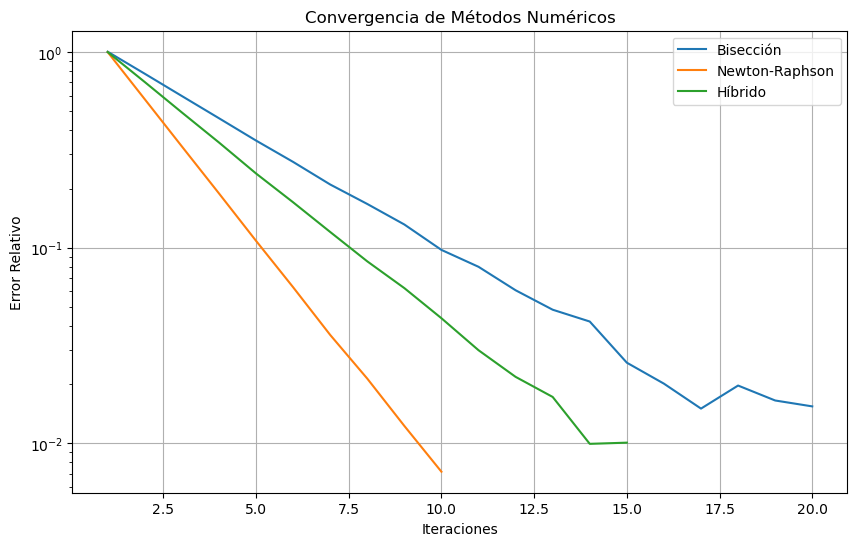

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_convergence(method_results, method_names):
    plt.figure(figsize=(10, 6))
    for result, name in zip(method_results, method_names):
        plt.semilogy(range(1, len(result) + 1), result, label=name)
    plt.xlabel('Iteraciones')
    plt.ylabel('Error Relativo')
    plt.title('Convergencia de Métodos Numéricos')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generamos datos de ejemplo para la convergencia de cada método
np.random.seed(0)  # Para reproducibilidad
bisection_results = np.exp(-np.linspace(0, 5, 20)) + 0.01 * np.random.rand(20)
newton_results = np.exp(-np.linspace(0, 5, 10)) + 0.001 * np.random.rand(10)
hybrid_results = np.exp(-np.linspace(0, 5, 15)) + 0.005 * np.random.rand(15)

# Uso de la función
plot_convergence([bisection_results, newton_results, hybrid_results], 
                 ['Bisección', 'Newton-Raphson', 'Híbrido'])

## 6. Aplicaciones Avanzadas en Ingeniería

### 6.1 Diseño de Sistemas de Tuberías Complejos
- Uso de métodos numéricos en la optimización de redes de tuberías
- Consideraciones de costo y eficiencia energética

### 6.2 Análisis de Flujo en Microcanales
- Aplicación a sistemas de refrigeración en electrónica
- Desafíos numéricos en escalas micrométricas

### 6.3 Aerodinámica de Vehículos
- Relación entre el factor de fricción y el coeficiente de arrastre
- Optimización de formas aerodinámicas

## 7. Tecnologías Emergentes y Futuras Direcciones

### 7.1 Machine Learning en Mecánica de Fluidos
- Uso de redes neuronales para predecir el factor de fricción
- Comparación con métodos numéricos tradicionales

### 7.2 Computación Cuántica
- Potencial de los algoritmos cuánticos en problemas de mecánica de fluidos
- Desafíos y oportunidades futuras

## 8. Proyecto Final Integrador

Diseñar un sistema de enfriamiento para un centro de datos, considerando:
- Optimización del diseño de tuberías usando métodos numéricos avanzados
- Análisis de sensibilidad y robustez del diseño
- Consideraciones de eficiencia energética y costo
- Presentación de resultados con visualizaciones avanzadas
- Discusión sobre la selección de métodos numéricos y su impacto en el diseño final

## 9. Conclusiones y Reflexiones

- Importancia de la selección cuidadosa de métodos numéricos en ingeniería
- Reflexión sobre la intersección entre métodos numéricos, mecánica de fluidos y tecnologías emergentes
- Discusión sobre el futuro de la simulación numérica en ingeniería mecánica y aeroespacial

## 10. Referencias Avanzadas y Recursos Adicionales

1. Moody, L.F. (1944). Friction factors for pipe flow. Transactions of the ASME, 66(8), 671-684.
2. Trefethen, L.N., & Bau III, D. (1997). Numerical linear algebra. SIAM.
3. Pope, S.B. (2000). Turbulent flows. Cambridge University Press.
4. Brunton, S.L., & Kutz, J.N. (2019). Data-driven science and engineering: Machine learning, dynamical systems, and control. Cambridge University Press.
5. Journal of Fluid Mechanics: [https://www.cambridge.org/core/journals/journal-of-fluid-mechanics](https://www.cambridge.org/core/journals/journal-of-fluid-mechanics)